# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

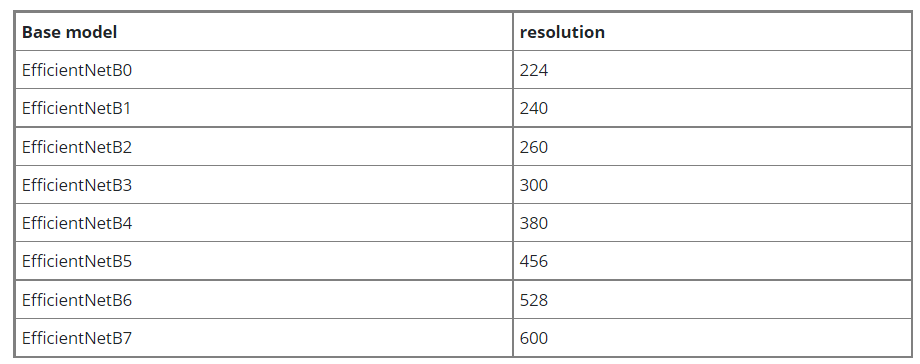

# Data Pre Processing

In [43]:
import numpy as np
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['foot-ulcers', 'Infected-necrotic-toes', 'leg-ulcer-images-venous-ulcer', 'pressure-ulcers-combine']
Types of classes labels found:  4


In [44]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])
    
    # Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

        Labels                                              image
0  foot-ulcers   dataset_path/foot-ulcers/309_0_foot-ulcer1-3.jpg
1  foot-ulcers  dataset_path/foot-ulcers/309_10_foot-ulcer1-3.jpg
2  foot-ulcers  dataset_path/foot-ulcers/309_11_foot-ulcer1-3.jpg
3  foot-ulcers  dataset_path/foot-ulcers/309_12_foot-ulcer1-3.jpg
4  foot-ulcers  dataset_path/foot-ulcers/309_13_foot-ulcer1-3.jpg
                       Labels  \
8037  pressure-ulcers-combine   
8038  pressure-ulcers-combine   
8039  pressure-ulcers-combine   
8040  pressure-ulcers-combine   
8041  pressure-ulcers-combine   

                                                  image  
8037  dataset_path/pressure-ulcers-combine/9_5_necro...  
8038  dataset_path/pressure-ulcers-combine/9_6_necro...  
8039  dataset_path/pressure-ulcers-combine/9_7_necro...  
8040  dataset_path/pressure-ulcers-combine/9_8_necro...  
8041  dataset_path/pressure-ulcers-combine/9_9_necro...  


In [45]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  8042
pressure-ulcers-combine          3654
leg-ulcer-images-venous-ulcer    2835
foot-ulcers                      1008
Infected-necrotic-toes            545
Name: Labels, dtype: int64


In [46]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [47]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(8042, 224, 224, 3)

In [50]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame
y = df['Labels'].values

# Print the original class labels
unique_classes = df['Labels'].unique()
print("Original Classes:", unique_classes)

# Apply label encoding
y_labelencoder = LabelEncoder()
y_encoded = y_labelencoder.fit_transform(y)

# Print the encoded values
print("Encoded Values:", y_encoded)


Original Classes: ['foot-ulcers' 'Infected-necrotic-toes' 'leg-ulcer-images-venous-ulcer'
 'pressure-ulcers-combine']
Encoded Values: [1 1 1 ... 3 3 3]


In [51]:

y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()
print(Y[:5])
print(Y[35:])

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (7982, 3)	1.0
  (7983, 3)	1.0
  (7984, 3)	1.0
  (7985, 3)	1.0
  (7986, 3)	1.0
  (7987, 3)	1.0
  (7988, 3)	1.0
  (7989, 3)	1.0
  (7990, 3)	1.0
  (7991, 3)	1.0
  (7992, 3)	1.0
  (7993, 3)	1.0
  (7994, 3)	1.0
  (7995, 3)	1.0
  (7996, 3)	1.0
  (7997, 3)	1.0
  (7998, 3)	1.0
  (7999, 3)	1.0
  (8000, 3)	1.0
  (8001, 3)	1.0
  (8002, 3)	1.0
  (8003, 3)	1.0
  (8004, 3)	1.0
  (8005, 3)	1.0
  (8006, 3)	1.0


In [52]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.15, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(6835, 224, 224, 3)
(6835, 4)
(1207, 224, 224, 3)
(1207, 4)



# EfficientNet Implementation :



In [54]:
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np
import tensorflow as tf

NUM_CLASSES = 4
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

# Assuming train_y is a SparseTensor, convert it to an array of integers
train_y = tf.sparse.to_dense(train_y)
train_y = tf.argmax(train_y, axis=1)  # If one-hot encoded, convert to class indices

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning

outputs = EfficientNetB0(include_top=True, weights=None, classes=NUM_CLASSES)(inputs)
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

hist = model.fit(train_x, train_y, epochs=30, verbose=2)


TypeError: Input must be a SparseTensor.

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [ ]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

# Testing Efficient Model On Unseen data

In [ ]:
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input


img_path = 'unseen_imagenet.jpg'

#img = image.load_img(img_path, target_size=(224, 224))
#x = img.img_to_array(img)

img = cv2.imread(img_path)
img = cv2.resize(img, (224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)

print('Input image shape:', x.shape)

my_image = imread(img_path)
imshow(my_image)

In [ ]:
preds=model.predict(x)
preds     # probabilities for being in each of the 3 classes

In [ ]:

# Cuda and cudnn is installed for this tensorflow version. So we can see GPU is enabled
tf.config.experimental.list_physical_devices()

In [ ]:
%%timeit -n1 -r1 
with tf.device('/CPU:0'):
    cpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    cpu_performance

In [ ]:

%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    gpu_performance =model.fit(train_x, train_y, epochs=30, verbose=2)
    gpu_performance

In [ ]:
# CPU completed the training in 7 min 53 Seconds and GPU did that training in 25.6 seconds